In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import nltk

In [4]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [5]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [6]:
nltk.download('worknet')

[nltk_data] Error loading worknet: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [7]:
nltk.download('omw-1.4')

[nltk_data] Error loading omw-1.4: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [8]:
from wordcloud import WordCloud

In [9]:
import matplotlib.pyplot as plt

In [10]:
from nltk.sentiment import SentimentAnalyzer

In [11]:
from nltk.tokenize import word_tokenize

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [13]:
from textblob import TextBlob

In [14]:
from nltk.corpus import stopwords 

In [15]:
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [16]:
df = pd.read_csv('C:/Users/abdul/Downloads/sentiment-analysis-on-movie-reviews/train.tsv/train.tsv', sep='\t')

In [17]:
len(df)

156060

In [18]:
df2 = pd.read_csv('C:/Users/abdul/Downloads/sentiment-analysis-on-movie-reviews/test.tsv/test.tsv', sep='\t')

In [19]:
len(df2)

66292

In [20]:
len(df2)/(len(df2)+len(df))

0.29813988630639704

In [21]:
df.merge(df2, 'outer')

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1.0
1,2,1,A series of escapades demonstrating the adage ...,2.0
2,3,1,A series,2.0
3,4,1,A,2.0
4,5,1,series,2.0
...,...,...,...,...
222347,222348,11855,"A long-winded , predictable scenario .",NaN
222348,222349,11855,"A long-winded , predictable scenario",NaN
222349,222350,11855,"A long-winded ,",NaN
222350,222351,11855,A long-winded,NaN


In [22]:
df.sample(2)

,PhraseId,SentenceId,Phrase,Sentiment
17929,17930,780,there is a great deal of fun .,4
155328,155329,8502,populates his movie,2


<AxesSubplot:xlabel='Sentiment'>

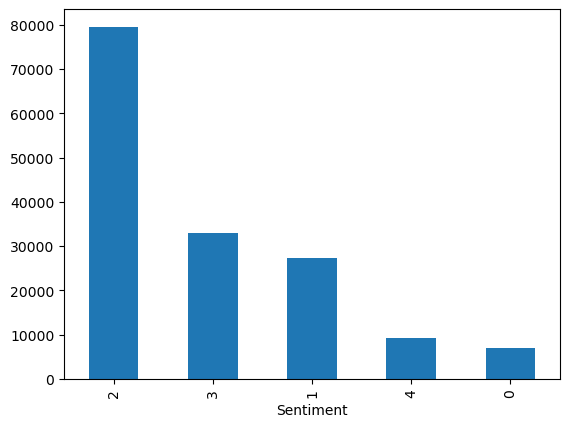

In [23]:
df.Sentiment.value_counts().plot(kind='bar')

0-negative

1-somewhat negative

2-neutral

3-somewhat positive

4-positive

In [24]:
stop_words = set(stopwords.words('english'))

In [25]:
stemmer = PorterStemmer()

In [26]:
lemmatizer = WordNetLemmatizer()

In [27]:
df['Processed_Phrase'] = df['Phrase'].apply(
    lambda x: ' '.join([word for word in word_tokenize(x.lower()) if word.isalpha() and word not in stop_words])
)

In [28]:
df.sample(5)

,PhraseId,SentenceId,Phrase,Sentiment,Processed_Phrase
111095,111096,5888,An instance of an old dog,2,instance old dog
77441,77442,3984,Has none of the crackle of `` Fatal Attraction...,0,none crackle fatal attraction weeks even indec...
70140,70141,3571,left me behind,1,left behind
121340,121341,6498,manages to generate a single threat of suspense,2,manages generate single threat suspense
18309,18310,800,Maid,2,maid


In [29]:
df.Processed_Phrase = df.Processed_Phrase.apply(lambda x: stemmer.stem(x))

In [30]:
df.Processed_Phrase = df.Processed_Phrase.apply(lambda x: lemmatizer.lemmatize(x))

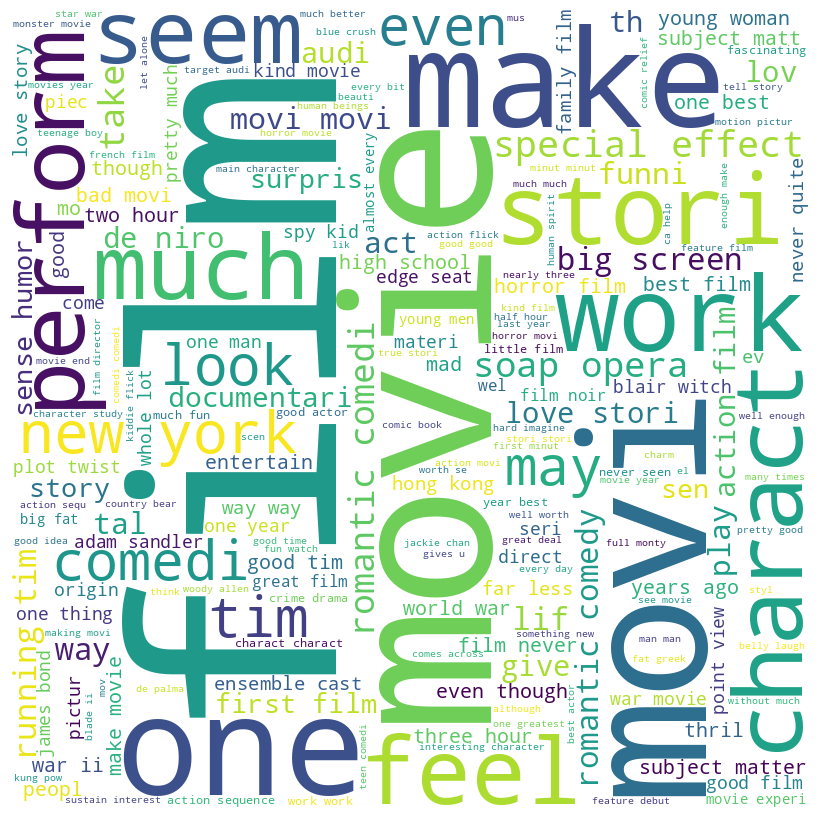

In [31]:
text = " ".join(df['Processed_Phrase'])

wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      min_font_size=10).generate(text)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

In [32]:
df['Sentiment_score'] = df.Processed_Phrase.apply(lambda i: TextBlob(i).sentiment.polarity)

0-negative

1-somewhat negative

2-neutral

3-somewhat positive

4-positive

In [33]:
df['Sentiment_updated'] = df.Sentiment_score.apply(
    lambda x: "Positive" if x >= 0.5 
    else "Somewhat Positive" if 0 < x < 0.5 
    else "Neutral" if x == 0 
    else "Somewhat Negative" if -0.5 <= x < 0 
    else "Negative"
)

In [34]:
df['Sentiment_class'] = df.Sentiment_updated.apply(
    lambda x: 4 if x == "Positive"
    else 3 if x == "Somewhat Positive" 
    else 2 if x == "Neutral"
    else 1 if x == "Somewhat Negative"
    else 0 
)

In [35]:
df['Sentiment_class'] = df['Sentiment_class'].astype(str)

In [36]:
tfidf_vectorizer = TfidfVectorizer()

In [37]:
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Processed_Phrase'])

In [38]:
df['TF_IDF_Score'] = tfidf_matrix.sum(axis=1)

In [39]:
df.head(2)

,PhraseId,SentenceId,Phrase,Sentiment,Processed_Phrase,Sentiment_score,Sentiment_updated,Sentiment_class,TF_IDF_Score
0,1,1,A series of escapades demonstrating the adage ...,1,series escapades demonstrating adage good goos...,0.4,Somewhat Positive,3,3.657116
1,2,1,A series of escapades demonstrating the adage ...,2,series escapades demonstrating adage good goos,0.7,Positive,4,2.389695


In [40]:
df.to_csv('../NewSentiment.csv',index=False)

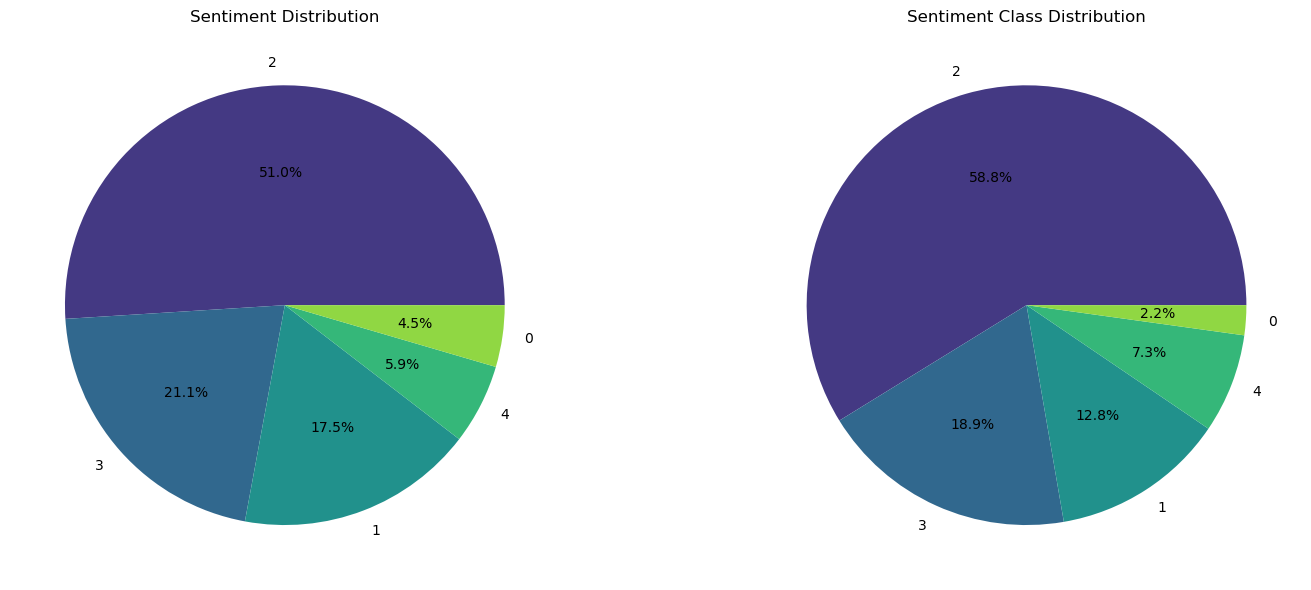

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sentiment_counts = df['Sentiment'].value_counts()
sentiment_class_counts = df['Sentiment_class'].value_counts()
axes[0].pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(sentiment_counts)))
axes[0].set_title('Sentiment Distribution')
axes[1].pie(sentiment_class_counts, labels=sentiment_class_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(sentiment_class_counts)))
axes[1].set_title('Sentiment Class Distribution')
plt.tight_layout()
plt.show()


In [42]:
df = df[['Phrase', 'Sentiment_class']]

In [43]:
df.head(2)

,Phrase,Sentiment_class
0,A series of escapades demonstrating the adage ...,3
1,A series of escapades demonstrating the adage ...,4


In [44]:
from sklearn.naive_bayes import MultinomialNB

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
from sklearn.model_selection import train_test_split, cross_val_score

In [47]:
from sklearn.metrics import classification_report, accuracy_score

In [48]:
X = df.Phrase

In [49]:
Y = df.Sentiment_class

In [50]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, train_size=0.7, random_state=32)

In [51]:
print(f"x_train shape: {x_train.shape}")

x_train shape: (109242,)


In [52]:
print(f"y_train shape: {y_train.shape}")

y_train shape: (109242,)


In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
le = LabelEncoder()

In [55]:
y_train_encoded = le.fit_transform(y_train)

In [56]:
y_test_encoded = le.transform(y_test)

In [57]:
from sklearn.pipeline import Pipeline

In [58]:
count_vectorizer = CountVectorizer(stop_words='english')

What is a calibrated model?? and why we are using it ??

A calibrated model adjusts predicted probabilities to better match the actual likelihood of outcomes. We use a calibrated model to improve the accuracy of predicted probabilities, making them more reliable and better reflecting the true likelihood of outcomes.








In [59]:
from sklearn.calibration import CalibratedClassifierCV

In [60]:
pipeline_lr = Pipeline([
    ('count_vectorizer', CountVectorizer(stop_words='english')),
    ('classifier', LogisticRegression())
])

pipeline_lr.fit(x_train, y_train)

calibrated_model_lr = CalibratedClassifierCV(base_estimator=pipeline_lr, cv='prefit')

calibrated_model_lr.fit(x_train, y_train)

y_proba_lr = calibrated_model_lr.predict_proba(x_test)

y_pred_lr = calibrated_model_lr.predict(x_test)

C:\Users\abdul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
print("Logistic Regression with CountVectorizer")
print(classification_report(y_test, y_pred_lr))

Logistic Regression with CountVectorizer
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1039
           1       0.90      0.83      0.86      6000
           2       0.93      0.97      0.95     27518
           3       0.89      0.84      0.87      8845
           4       0.84      0.81      0.82      3416

    accuracy                           0.91     46818
   macro avg       0.88      0.86      0.87     46818
weighted avg       0.91      0.91      0.91     46818



In [62]:
pipeline_mnb = Pipeline([
    ('count_vectorizer', CountVectorizer(stop_words='english')),
    ('classifier', MultinomialNB())
])

pipeline_mnb.fit(x_train, y_train)

calibrated_model_mnb = CalibratedClassifierCV(base_estimator=pipeline_mnb, cv='prefit')

calibrated_model_mnb.fit(x_train, y_train)

y_proba_mnb = calibrated_model_mnb.predict_proba(x_test)

y_pred_mnb = calibrated_model_mnb.predict(x_test)

In [63]:
print("Naive Bayes with CountVectorizer")
print(classification_report(y_test, y_pred_mnb))

Naive Bayes with CountVectorizer
              precision    recall  f1-score   support

           0       0.76      0.52      0.62      1039
           1       0.75      0.72      0.74      6000
           2       0.88      0.91      0.89     27518
           3       0.75      0.73      0.74      8845
           4       0.74      0.68      0.71      3416

    accuracy                           0.83     46818
   macro avg       0.78      0.71      0.74     46818
weighted avg       0.82      0.83      0.82     46818



In [64]:
accuracy_scores = [
    {'Model': 'Logistic Regression', 'Accuracy Score': accuracy_score(y_test, y_pred_lr)},
    {'Model': 'Naive Bayes', 'Accuracy Score': accuracy_score(y_test, y_pred_mnb)},
]

accuracy_df = pd.DataFrame(accuracy_scores).sort_values(by='Accuracy Score', ascending=False)
accuracy_df.head()

,Model,Accuracy Score
0,Logistic Regression,0.911701
1,Naive Bayes,0.826093


<AxesSubplot:xlabel='Accuracy Score', ylabel='Model'>

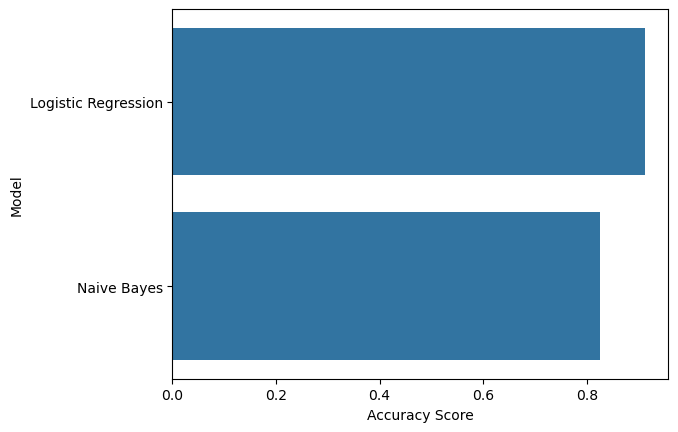

In [65]:
sns.barplot(data=accuracy_df, x='Accuracy Score', y='Model')

In [66]:
pred = [x_test.iloc[271]]
pred

['a river of sadness that pours into every frame']

In [67]:
print(f"Without Calibration: {pipeline_mnb.predict(pred)[0]}")

print('Vs')

print(f"With Calibration: {calibrated_model_mnb.predict(pred)[0]}")

Without Calibration: 2
Vs
With Calibration: 2


In [68]:
print(f"Without Calibration: {pipeline_lr.predict(pred)[0]}")

print('Vs')

print(f"With Calibration: {calibrated_model_lr.predict(pred)[0]}")

Without Calibration: 2
Vs
With Calibration: 2


0-negative

1-somewhat negative

2-neutral

3-somewhat positive

4-positive

In [69]:
input_sentiment = input('Your sentiment: ').lower()
pred = [input_sentiment]
print('------'*3)
print(f"Logistic Regression Prediction: {calibrated_model_lr.predict(pred)[0]}")
print(f"Naive Bayes Prediction: {calibrated_model_mnb.predict(pred)[0]}")

Your sentiment: At its worst, humanity can show a disregard for life and nature, engaging in destructive behaviors that harm others and the environment, driven by greed and indifference.
------------------
Logistic Regression Prediction: 0
Naive Bayes Prediction: 1


In [70]:
input_sentiment = input('Your sentiment: ').lower()
pred = [input_sentiment]
print('------'*3)
print(f"Logistic Regression Prediction: {calibrated_model_lr.predict(pred)[0]}")
print(f"Naive Bayes Prediction: {calibrated_model_mnb.predict(pred)[0]}")

Your sentiment: Karachi is a vibrant and dynamic city, renowned for its rich cultural heritage, bustling markets, and the warm hospitality of its people
------------------
Logistic Regression Prediction: 3
Naive Bayes Prediction: 3


In [71]:
# Done